<a href="https://colab.research.google.com/github/ErvaUras/PythonDataScienceHandbook/blob/master/IDSA_1st_Project_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas as pd
# df1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_210501.txt")
# df2 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_210508.txt")
# df3 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_210515.txt")
# df4 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_210522.txt")
# df5 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_210529.txt")

# df_main = pd.concat([df1, df2,df3,df4,df5])


# Kütüphaneleri Yükleme

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.float_format = '{:.2f}'.format

# Verisetini Okuma

In [ ]:
num_weeks = 4

start_date = filedate = pd.Timestamp('2022-05-07 00:00:00')

filename_regex = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
# http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt
filelist = []

for numfiles in range(num_weeks):

    filedate_str = str(filedate.year)[2:4] + str(
        filedate.month).zfill(2) + str(filedate.day).zfill(2)
    filename = filename_regex.format(filedate_str)

    df = pd.read_csv(filename, parse_dates=['DATE'], keep_date_col=True)
    filelist.append(df)

    filedate += pd.Timedelta(days=7)

df_raw = pd.concat(filelist, axis=0, ignore_index=True)

In [ ]:
df_raw.shape
df.columns

(844371, 11)

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [ ]:
df_raw.rename(columns=lambda x: x.strip(), inplace=True)

In [ ]:
df = df_raw.copy()

In [ ]:
df.head().append(df.tail())

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-30,00:00:00,REGULAR,7706010,2698804
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-30,04:00:00,REGULAR,7706014,2698808
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-30,08:00:00,REGULAR,7706017,2698835
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-30,12:00:00,REGULAR,7706038,2698924
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-30,16:00:00,REGULAR,7706084,2698963
844366,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-27,05:00:00,REGULAR,0,382
844367,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-27,09:00:00,REGULAR,0,382
844368,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-27,13:00:00,REGULAR,0,383
844369,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-27,17:00:00,REGULAR,0,386
844370,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-27,21:00:00,REGULAR,0,388


# Basic Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844371 entries, 0 to 844370
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   C/A       844371 non-null  object        
 1   UNIT      844371 non-null  object        
 2   SCP       844371 non-null  object        
 3   STATION   844371 non-null  object        
 4   LINENAME  844371 non-null  object        
 5   DIVISION  844371 non-null  object        
 6   DATE      844371 non-null  datetime64[ns]
 7   TIME      844371 non-null  object        
 8   DESC      844371 non-null  object        
 9   ENTRIES   844371 non-null  int64         
 10  EXITS     844371 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 70.9+ MB


In [ ]:
df.describe()

,ENTRIES,EXITS
count,844371.00,844371.00
mean,43242883.35,34888413.51
std,224233690.23,198330493.43
min,0.00,0.00
25%,250975.50,133498.50
50%,1352891.00,890006.00
75%,5957735.00,3974079.50
max,2147295756.00,2122325897.00


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

C/A            753
UNIT           470
SCP            224
STATION        379
LINENAME       114
DIVISION         6
DATE            28
TIME         28870
DESC             2
ENTRIES     657333
EXITS       643067
dtype: int64

In [ ]:
df.DESC.value_counts()

REGULAR       840728
RECOVR AUD      3643
Name: DESC, dtype: int64

In [ ]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-30,00:00:00,REGULAR,7706010,2698804
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-30,04:00:00,REGULAR,7706014,2698808
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-30,08:00:00,REGULAR,7706017,2698835
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-30,12:00:00,REGULAR,7706038,2698924
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-30,16:00:00,REGULAR,7706084,2698963


# Data Temizliği

- [ ] datetime sütunu oluşturup tipini dönüştür + << artan düzende sırala >>
- [ ] turnike sütununu oluştur 
- [ ] 'DESC' sütununu analiz et ve buna göre satırları sil
- [ ] Her girdi için turnike sayımını elde etmek için giriş/çıkış sayılarını önceki satırdan çıkart
- [ ] negatif girişleri ve çıkışları kaldır
- [ ] 14400'den büyük toplam trafiği kaldır
- [ ] datetime sütunundan haftanın günlerini üret

In [ ]:
df['datetime'] = pd.to_datetime(df.DATE.astype(str) + ' ' + df.TIME.astype(str))
df['turnstile'] = df['C/A'] + '-' + df['UNIT'] + '-' + df['SCP']

In [ ]:
# df['day'] = df['datetime'].dt.day_name()
# df['hour'] = df.datetime.map(lambda x: x.hour)
# df['period'] = df.hour // 4
# df['weekday'] = df_sorted['DATE'].dt.day_name()

In [ ]:
# "recovered audits" Toplam datanın %1 inden daha küçük, atıldı. Sadece düzenli denetimliler kaldı.
df.DESC.value_counts()

df = pd.DataFrame(df[df.DESC == "REGULAR"])

REGULAR       840728
RECOVR AUD      3643
Name: DESC, dtype: int64

In [ ]:
df[df.duplicated(subset=["C/A", "UNIT", "SCP",  "STATION", "datetime"])]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,turnstile


In [ ]:
print('Descriptions of entries:\n\n{}\n'.format(df["ENTRIES"].describe()))
print('Descriptions of exits:\n\n{}'.format(df["EXITS"].describe()))

Descriptions of entries:

count       840728.00
mean      43250426.10
std      224251261.28
min              0.00
25%         251512.75
50%        1354764.50
75%        5960609.00
max     2147295756.00
Name: ENTRIES, dtype: float64

Descriptions of exits:

count       840728.00
mean      34894855.01
std      198365146.04
min              0.00
25%         134117.00
50%         891496.50
75%        3976806.50
max     2122325897.00
Name: EXITS, dtype: float64


**Anormal giriş-çıkış değerleri var mı? **
 
*   Girişler ve çıkışlar kümülatif olduğundan değerler negatif olmamalıdır.
*   Girişler çıkışlardan çok olabilir. Çünkü bu tarz yerlerde çıkış kayıtlarını toplamayan acil çıkış kapıları olur.

* NaN gözlem sayısı, turnikelerin sayısına eşit olmalıdır.
* Kümülatif değerlerin artması veya en azından eşit kalması gerektiği için n_in ve n_out her zaman pozitif olmalıdır.

In [ ]:
# Her satırda farklar hesaplanıp, Zaman aralığı başına anormal giriş-çıkışlar hesaplandı. 
# Fark hesaplanırken her bir turnike başına ilk veri kaydı NaN oluşur.

# verileri turnikeye göre gruplandır, her turnikeyi tarihe göre sırala 
# Her benzersiz turnike için yeni n_in ve n_out sütunları oluştur 
# kümülatif sayıları aralık başına sayımlara dönüştür

df_sorted = df.sort_values(['turnstile', 'datetime']).reset_index(drop = True)

turnstile_grouped = df_sorted.groupby(['turnstile'])

df_sorted['n_in'] = turnstile_grouped['ENTRIES'].transform(pd.Series.diff)
df_sorted['n_out'] = turnstile_grouped['EXITS'].transform(pd.Series.diff)

df_sorted.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,turnstile,n_in,n_out
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-30,00:00:00,REGULAR,7706010,2698804,2022-04-30 00:00:00,A002-R051-02-00-00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-30,04:00:00,REGULAR,7706014,2698808,2022-04-30 04:00:00,A002-R051-02-00-00,4.00,4.00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-30,08:00:00,REGULAR,7706017,2698835,2022-04-30 08:00:00,A002-R051-02-00-00,3.00,27.00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-30,12:00:00,REGULAR,7706038,2698924,2022-04-30 12:00:00,A002-R051-02-00-00,21.00,89.00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-30,16:00:00,REGULAR,7706084,2698963,2022-04-30 16:00:00,A002-R051-02-00-00,46.00,39.00


In [ ]:
print('Number of negative entries: %d' %len(df_sorted['n_in'][df_sorted['n_in'] < 0]))
print('Number of negative exits: %d' %len(df_sorted['n_out'][df_sorted['n_out'] < 0]))
print('Number of unique turnstiles: %d' %len(df_sorted['turnstile'].unique()))
print('Number of NaN rows: %d' %len(df_sorted[df_sorted['n_in'].isnull()]))

Number of negative entries: 8566
Number of negative exits: 5013
Number of unique turnstiles: 5046
Number of NaN rows: 5046


In [ ]:
df_sorted['total_traffic'] = df_sorted.n_in + df_sorted.n_out

In [ ]:
df_sorted.describe()

,ENTRIES,EXITS,n_in,n_out,total_traffic
count,840728.00,840728.00,835682.00,835682.00,835682.00
mean,43250426.10,34894855.01,-74.65,9.25,-65.40
std,224251261.28,198365146.04,42706.99,21350.14,62096.37
min,0.00,0.00,-18248273.00,-9011181.00,-25376476.00
25%,251512.75,134117.00,4.00,7.00,16.00
50%,1354764.50,891496.50,29.00,39.00,90.00
75%,5960609.00,3976806.50,97.00,119.00,238.00
max,2147295756.00,2122325897.00,553919.00,872497.00,879835.00


In [ ]:
# n_in ve n_out'un kontrolü;
print('Descriptions of number of entries:\n{}'.format(df_sorted['n_in'].describe()))
print('\nDescriptions of number of exits:\n{}'.format(df_sorted['n_out'].describe()))

Descriptions of number of entries:
count      835682.00
mean          -74.65
std         42706.99
min     -18248273.00
25%             4.00
50%            29.00
75%            97.00
max        553919.00
Name: n_in, dtype: float64

Descriptions of number of exits:
count     835682.00
mean           9.25
std        21350.14
min     -9011181.00
25%            7.00
50%           39.00
75%          119.00
max       872497.00
Name: n_out, dtype: float64


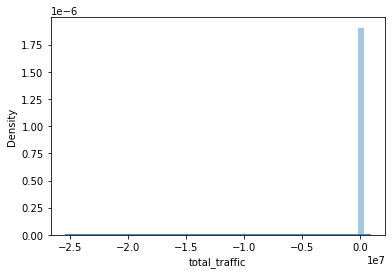

In [ ]:
sns.distplot(df_sorted.total_traffic, kde=True);

In [ ]:
len(df_sorted[df_sorted.total_traffic<0])/len(df_sorted)

0.008655593723534841

* Giriş ve çıkışlar kümülatif arttığı için bu değerler negatif olamaz, anormaldir. Bu değerleri attık.
* negatif değerlerin gelme sebebi SCP değerlerinin, yani turnikenin değişmesidir  `df_sorted[df_sorted['n_in'] < 0]`
* n_in ve n_out un max değerleri %75lik dilimlerden çok daha büyüktür. Bir turnikeden 1 saniyede 1 kişinin geçeceğini varsayalım. Bu, belirli bir turnikeden geçen 14400 kişinin 4 saatlik geçişini kapsıyor.
* Her bir turnikenin ilk veri kaydı olmasından kaynaklı oluşan NaN ları 0 ile doldurduk.




In [ ]:
df_sorted['n_in'] = df_sorted['n_in'].fillna(0)
df_sorted['n_out'] = df_sorted['n_out'].fillna(0)

In [ ]:
mask = (df_sorted.n_in >= 0) & (df_sorted.n_out >= 0) & (df_sorted.total_traffic >= 0) & (df_sorted.total_traffic < 14400)
df_sorted = df_sorted[mask]

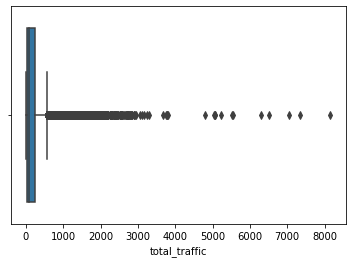

In [ ]:
sns.boxplot(df_sorted.total_traffic);

In [ ]:
# df_sorted['day_of_week'] = df_sorted['datetime'].apply(lambda x : x.weekday())

In [ ]:
stations_totals = df_sorted.groupby('STATION', as_index=False).total_traffic.sum()

In [ ]:
stations_totals.head()

,STATION,total_traffic
0,1 AV,655404.00
1,103 ST,779586.00
2,103 ST-CORONA,667417.00
3,104 ST,97931.00
4,110 ST,321446.00


In [ ]:
stations_totals.rename(columns={'total_traffic':'total_st_traffic'}, inplace=True)

In [ ]:
stations_totals.sort_values(by='total_st_traffic', ascending=False, inplace=True)

In [ ]:
# Top 10 istasyon
stations_totals[:11]

,STATION,total_st_traffic
61,34 ST-PENN STA,3598691.00
233,GRD CNTRL-42 ST,2980865.00
59,34 ST-HERALD SQ,2735286.00
14,14 ST-UNION SQ,2425679.00
110,86 ST,2369011.00
353,TIMES SQ-42 ST,2346190.00
46,23 ST,2326258.00
68,42 ST-PORT AUTH,2119052.00
226,FULTON ST,2050821.00
9,125 ST,2010563.00
